In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("temperature_device_failure.csv")

In [3]:
data.head()

,timestamp,value
0,7/4/2013 0:00,69.880835
1,7/4/2013 1:00,71.220227
2,7/4/2013 2:00,70.877805
3,7/4/2013 3:00,68.959400
4,7/4/2013 4:00,69.283551


In [4]:
data.shape

(7267, 2)

In [5]:
def return_null_value_summary(data):
    return data.isnull().sum().to_dict()
    
return_null_value_summary(data)

{'timestamp': 0, 'value': 0}

In [6]:
data.dtypes

timestamp     object
value        float64
dtype: object

In [7]:
data['time_stamp'] = pd.to_datetime(data['timestamp'])
data = data.sort_values('time_stamp')

#### 1) Plot / Visualize the 'original' dataset (hint: this is a Time Series object)

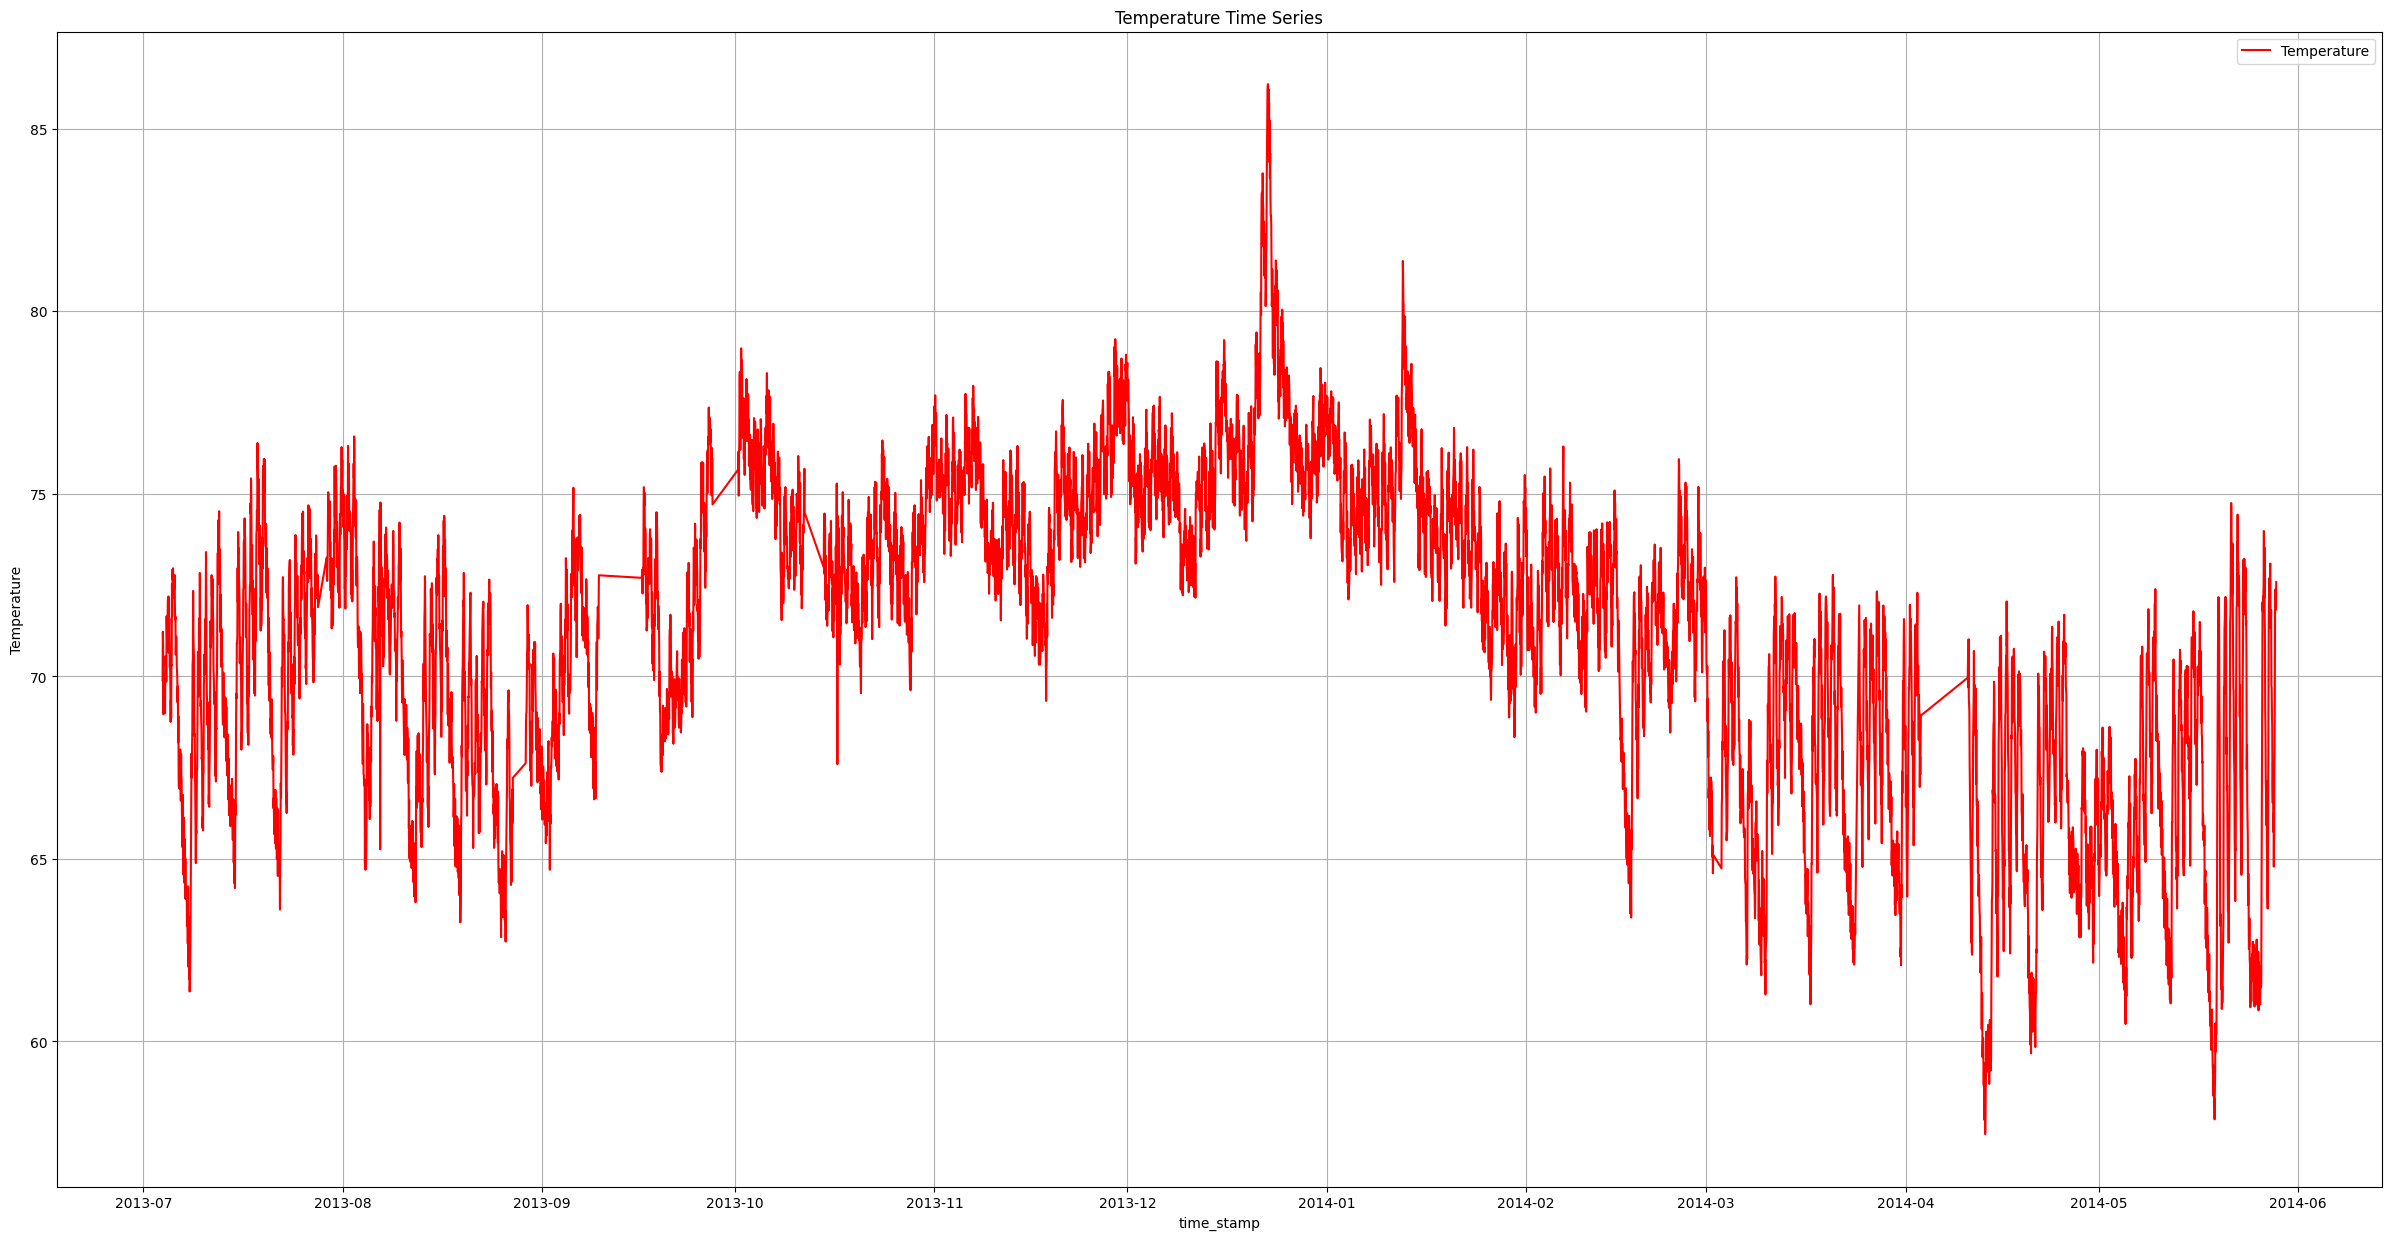

In [8]:
plt.figure(figsize=(30, 15))
plt.plot(data['time_stamp'], data['value'], label='Temperature', color = 'r')
plt.xlabel('time_stamp')
plt.ylabel('Temperature')
plt.title('Temperature Time Series')
plt.legend()
plt.grid(True)
plt.show()

#### Perform Feature Engineering on the dataset such that new features to be added. 
Specifically, you need to create a feature that will indicate the day of the week and time 
of the day. Namely, there should be four (4) categories (clusters?) for the feature, name it 
'dtcat' (date-time-category): 
- Weekday Day 
- Weekday Night 
- Weekend Day 
- Weekend Night 

In [9]:
data['day'] = data['time_stamp'].dt.day
data['dayofweek'] = data['time_stamp'].dt.dayofweek
data['hours'] = data['time_stamp'].dt.hour


In [10]:
def categorize_dtcat(row):
    if 7 <= row.hour < 19: 
        if row.dayofweek < 5: 
            return 'Weekday Day'
        else: 
            return 'Weekend Day'
    else: 
        if row.dayofweek < 5:  
            return 'Weekday Night'
        else: 
            return 'Weekend Night'

data['dtcat'] = data['time_stamp'].apply(categorize_dtcat)


In [11]:
data.head(25)

,timestamp,value,time_stamp,day,dayofweek,hours,dtcat
0,7/4/2013 0:00,69.880835,2013-07-04 00:00:00,4,3,0,Weekday Night
1,7/4/2013 1:00,71.220227,2013-07-04 01:00:00,4,3,1,Weekday Night
2,7/4/2013 2:00,70.877805,2013-07-04 02:00:00,4,3,2,Weekday Night
3,7/4/2013 3:00,68.959400,2013-07-04 03:00:00,4,3,3,Weekday Night
4,7/4/2013 4:00,69.283551,2013-07-04 04:00:00,4,3,4,Weekday Night
5,7/4/2013 5:00,70.060966,2013-07-04 05:00:00,4,3,5,Weekday Night
6,7/4/2013 6:00,69.279765,2013-07-04 06:00:00,4,3,6,Weekday Night
7,7/4/2013 7:00,69.369608,2013-07-04 07:00:00,4,3,7,Weekday Day
8,7/4/2013 8:00,69.166714,2013-07-04 08:00:00,4,3,8,Weekday Day
9,7/4/2013 9:00,68.986083,2013-07-04 09:00:00,4,3,9,Weekday Day


#### Apply the K-Means algorithm to the revised dataset and determine the best value for K.
I would suggest to test K in the range of [1, 20]. Plot a graph showing the number of 
clusters (K) in relation to score of each K-Means model. (Look at slide #20 from lecture 
for setting up the plot...) 

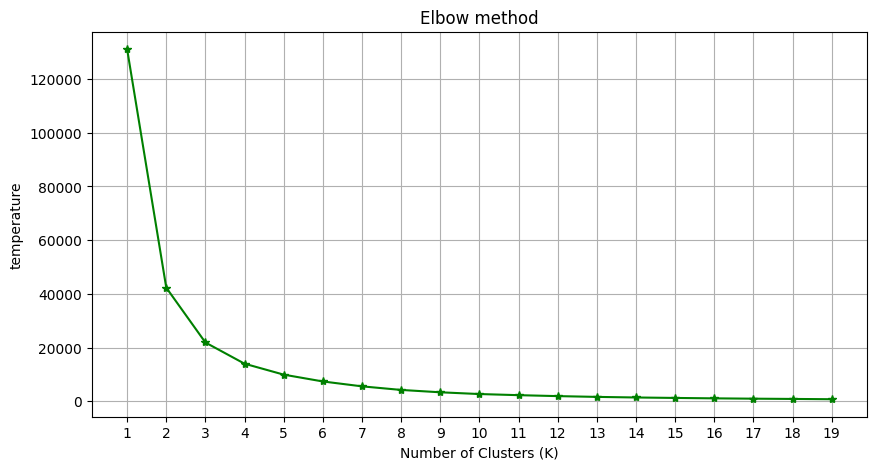

In [12]:
plt.figure(figsize=(10, 5))
cluster_range = range(1,20)
cluster_ranges = []
for i in cluster_range:
    k_means_obj = KMeans(n_clusters = i)
    k_means_obj.fit(data[['value']])
    cluster_ranges.append(k_means_obj.inertia_)
plt.title("Elbow method")    
plt.xlabel('Number of Clusters (K)')
plt.ylabel('temperature')
plt.plot(cluster_range,cluster_ranges,marker = '*' , color = 'green')
plt.grid(True)
plt.xticks([i for i in range (1,20)])
plt.show()

#### After determining the best value of K, plot (scatter plot) all these K clusters by choosing 
2 features from the dataset. Should the dataset has more than 2 features (which most 
likely will be the case), apply PCA to derive those 2 features (2 Principal Components)
[pca = PCA(n_components=2), then 'fit' pca into the dataset] 

In [13]:


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['value',  'day', 'dayofweek', 'hours']])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(principal_components)

data['cluster'] = labels =kmeans.labels_


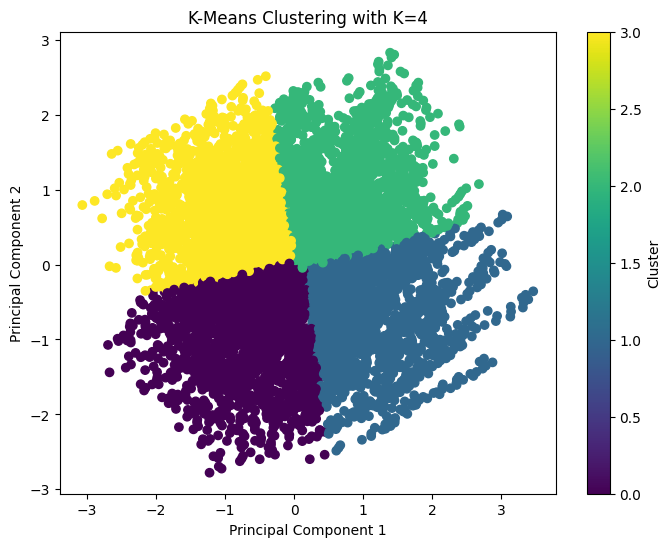

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
plt.title(f'K-Means Clustering with K={4}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [15]:
numeric_features = data[['value',  'day', 'dayofweek', 'hours' ]]
top_feature_names = [numeric_features.columns[i] for i in pca.components_.argsort(axis=1)[:, -1:-3:-1]]
print("Top feature names for the first two principal components:")
for i, feature_names in enumerate(top_feature_names):
    print(f"Principal Component {i + 1}: {feature_names}")

Top feature names for the first two principal components:
Principal Component 1: Index(['dayofweek', 'day'], dtype='object')
Principal Component 2: Index(['day', 'value'], dtype='object')


#### calculate outliers_fraction by finding the total number of outliers utilizing the IQR Method; specifically use the 1.5 x IQR rule 

In [16]:

def find_outliers(data , column):
 
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers

outliers = find_outliers(data,'value')


In [17]:
outliers_fraction = outliers.shape[0]/data.shape[0]
print(f"outliers_fraction for value using IQR Method is {outliers_fraction}")

outliers_fraction for value using IQR Method is 0.004816292830604101


#### Apply the Gaussian distribution (EllipticEnvelope) algorithm, as defined at step 2. 
(Use this command: from sklearn.covariance import EllipticEnvelope)
List anomalies (if any) in each category and show them graphically 

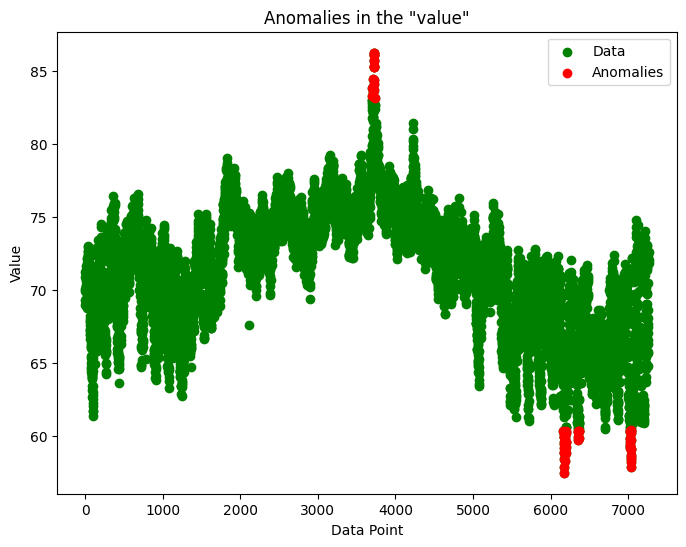

In [18]:
def compute_and_plot_elliptic_envlope(data , contamination): 
    model = EllipticEnvelope(contamination=contamination) 
    model.fit(data)
    anomalies = model.predict(data)
    gaussian_anomaly_indices = np.where(anomalies == -1)[0]
    plt.figure(figsize=(8, 6))
    plt.scatter(np.arange(len(data)), data, c='g', label='Data')
    plt.scatter(gaussian_anomaly_indices, data.iloc[gaussian_anomaly_indices], c='r', label='Anomalies')
    plt.title('Anomalies in the "value"')
    plt.xlabel('Data Point')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    return model , gaussian_anomaly_indices

elliptic_envlope_model , gaussian_anomaly_indices = compute_and_plot_elliptic_envlope(data[['value']], 0.01)

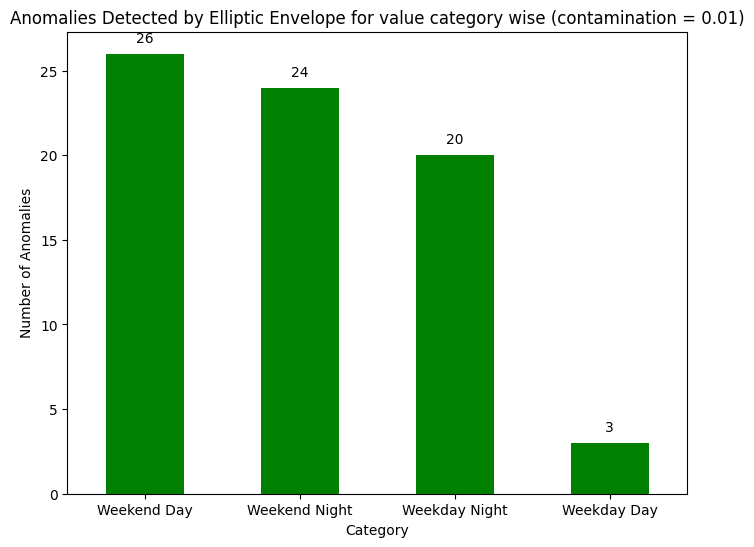

In [19]:
gaussian_anomaly = data.iloc[gaussian_anomaly_indices].value_counts('dtcat')
axis = gaussian_anomaly.plot(kind='bar', figsize=(8, 6), color = 'g')
for i, v in enumerate(gaussian_anomaly):
    axis.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.xlabel('Category')
plt.ylabel('Number of Anomalies')
plt.title(f'Anomalies Detected by Elliptic Envelope for value category wise (contamination = 0.01)')
plt.xticks(rotation=360)
plt.show()

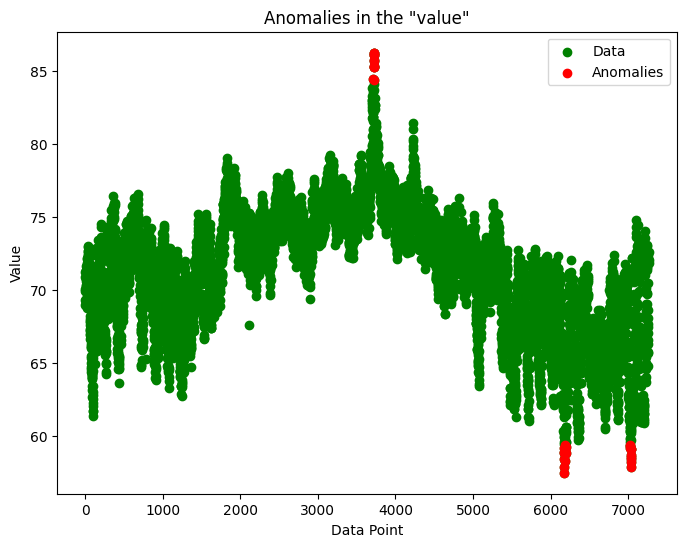

In [20]:
elliptic_envlope_model , gaussian_anomaly_indices = compute_and_plot_elliptic_envlope(data[['value']], outliers_fraction )

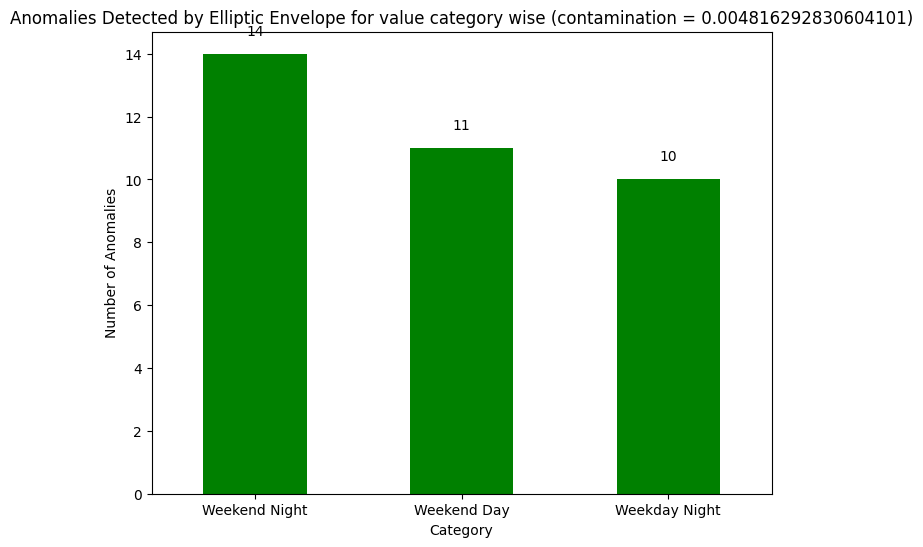

In [21]:
gaussian_anomaly = data.iloc[gaussian_anomaly_indices].value_counts('dtcat')
axis = gaussian_anomaly.plot(kind='bar', figsize=(8, 6), color = 'g')
for i, v in enumerate(gaussian_anomaly):
    axis.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.xlabel('Category')
plt.ylabel('Number of Anomalies')
plt.title(f'Anomalies Detected by Elliptic Envelope for value category wise (contamination = {outliers_fraction})')
plt.xticks(rotation=360)
plt.show()

#### Apply the Isolation Forest algorithm at each category, as defined step 2. 
(Use this command: from sklearn.ensemble import IsolationForest)
List anomalies (if any) in each category and show them graphically 

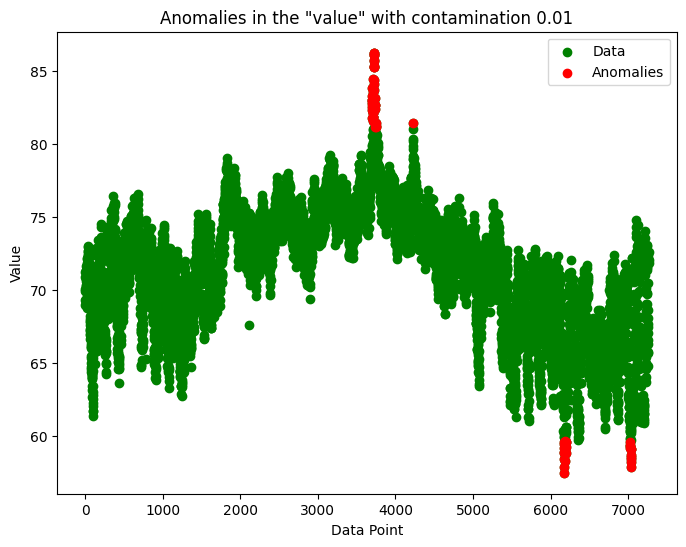

In [22]:
def compute_and_plot_isolation_forest(data , contamination):
    model = IsolationForest(contamination= contamination) 
    model.fit(data)
    
    anomalies = model.predict(data)
    isolation_anomaly_indices = np.where(anomalies == -1)[0]
    plt.figure(figsize=(8, 6))
    plt.scatter(np.arange(len(data)), data, c='g', label='Data')
    plt.scatter(isolation_anomaly_indices, data.iloc[isolation_anomaly_indices], c='r', label='Anomalies')
    plt.title(f'Anomalies in the "value" with contamination {contamination}')
    plt.xlabel('Data Point')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    return model , isolation_anomaly_indices

isolation_forest_model , isolation_anomaly_indices = compute_and_plot_isolation_forest(data[['value']] , 0.01)

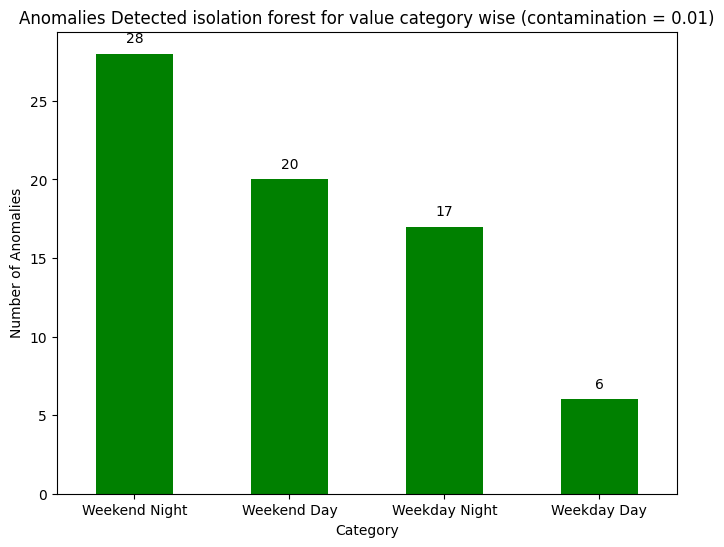

In [23]:
isolation_anomaly = data.iloc[isolation_anomaly_indices].value_counts('dtcat')
axis = isolation_anomaly.plot(kind='bar', figsize=(8, 6) , color = 'g')
for i, v in enumerate(isolation_anomaly):
    axis.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.xlabel('Category')
plt.ylabel('Number of Anomalies')
plt.title(f'Anomalies Detected isolation forest for value category wise (contamination = {0.01})')
plt.xticks(rotation=360)
plt.show()

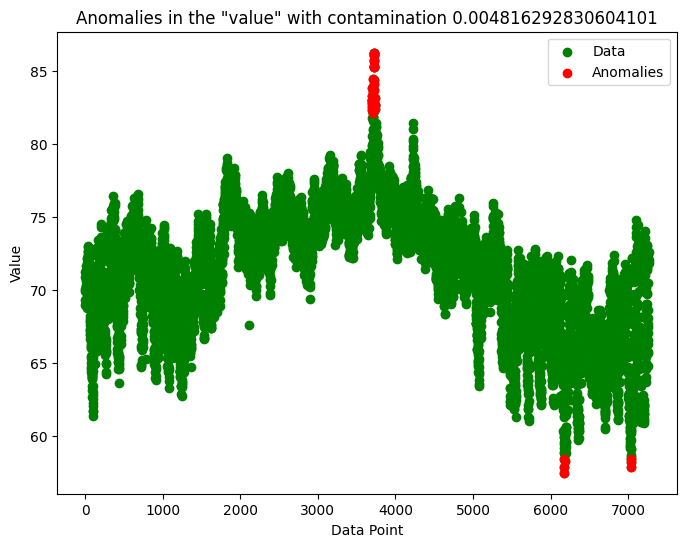

In [24]:
isolation_forest_model , isolation_anomaly_indices = compute_and_plot_isolation_forest(data[['value']] , outliers_fraction)

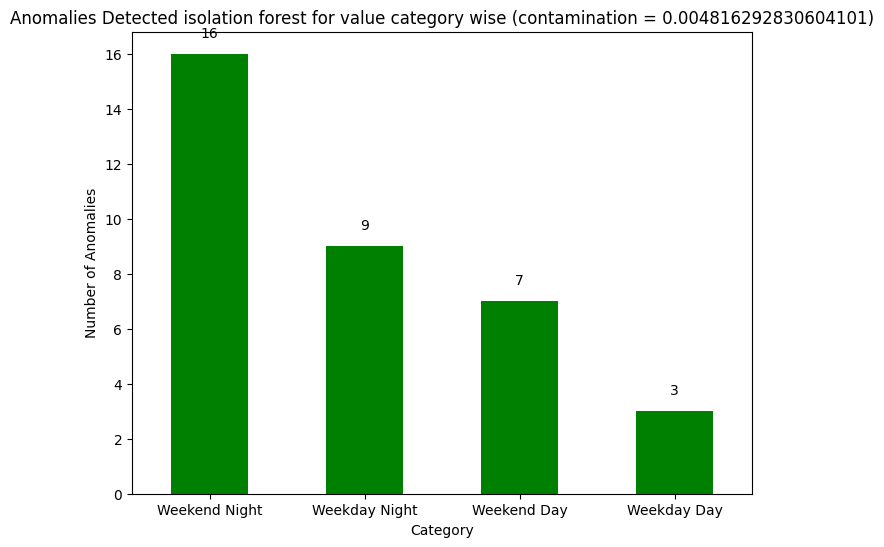

In [25]:
isolation_anomaly = data.iloc[isolation_anomaly_indices].value_counts('dtcat')
axis = isolation_anomaly.plot(kind='bar', figsize=(8, 6) , color = 'g')
for i, v in enumerate(isolation_anomaly):
    axis.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.xlabel('Category')
plt.ylabel('Number of Anomalies')
plt.title(f'Anomalies Detected isolation forest for value category wise (contamination = {outliers_fraction})')
plt.xticks(rotation=360)
plt.show()

#### Which of the two (2) models performs better on detecting anomalies? 

In [26]:
outliers_iqr = outliers[['value']]

In [27]:
elliptic_envlope_predictions = elliptic_envlope_model .predict(outliers_iqr)
isolation_predictions = isolation_forest_model.predict(outliers_iqr)

In [28]:
isolation_forest_accuracy = np.count_nonzero(isolation_predictions == -1) / len(outliers_iqr)
elliptic_envlope_accuracy = np.count_nonzero(elliptic_envlope_predictions == -1) / len(outliers_iqr)

In [29]:
if isolation_forest_accuracy ==  elliptic_envlope_accuracy:
    print("Both models are performing same")
elif isolation_forest_accuracy > elliptic_envlope_accuracy:
    print("Isolation forest is performing good")
else :
    print("Gaussian Distribution is performing good")

Gaussian Distribution is performing good


As per me, Both models are performing good at contamination = `0.01`, we can conculde the same by looking at above plots. Mean while when  contamination = `iqr outliers fraction (0.048)` there is little difference in the performance of the model. To confirm the same, I have did an accuracy test w.r.t IQR outliers to model prediction which results in Gaussian Distribution is having better performance as compared to Isolation forest